In [ ]:
#pip install keras

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/Covid Dataset/newdata"

/content/gdrive/My Drive/Covid Dataset/newdata


In [ ]:
data = pd.read_csv('FinData.csv')

In [ ]:
arr = data["label"].unique() 
arr

array([1, 2])

In [ ]:
data.head

<bound method NDFrame.head of                                             id  label
0    01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg      1
1    03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg      1
2         1-s2.0-S0140673620303706-fx1_lrg.jpg      1
3       1-s2.0-S0929664620300449-gr2_lrg-a.jpg      1
4       1-s2.0-S0929664620300449-gr2_lrg-b.jpg      1
..                                         ...    ...
652                  NORMAL2-IM-1064-0001.jpeg      2
653             NORMAL2-IM-1067-0001-0001.jpeg      2
654                  NORMAL2-IM-1067-0001.jpeg      2
655                  NORMAL2-IM-1073-0001.jpeg      2
656                  NORMAL2-IM-1084-0001.jpeg      2

[657 rows x 2 columns]>

In [ ]:
train_image = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img("/content/gdrive/My Drive/Covid Dataset/newdata/" + data['id'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
print(type(X))

  0%|          | 0/657 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 657/657 [06:00<00:00,  1.82it/s]

<class 'numpy.ndarray'>


In [ ]:
print('x_train shape:', X.shape)

x_train shape: (657, 28, 28, 1)


In [ ]:
y_init=data['label'].values
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    #print(integer_encoded.shape)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    #print(onehot_encoded)

    y = onehot_encoded
    #print(y)
    return y, label_encoder, onehot_encoder
y, label_encoder, onehot_encoder = prepare_labels(y_init)
y.shape

(657, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
print('y_train shape:', y_train.shape)

y_train shape: (525, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size =(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 128)         0

In [ ]:
history=model.fit(X_train, y_train, epochs=300, validation_split=0.2,batch_size=32)

Epoch 1/300
14/14 [==============================] - 7s 56ms/step - loss: 0.6120 - accuracy: 0.7142 - val_loss: 0.6051 - val_accuracy: 0.7333
Epoch 2/300
14/14 [==============================] - 0s 9ms/step - loss: 0.4617 - accuracy: 0.8057 - val_loss: 0.5218 - val_accuracy: 0.7333
Epoch 3/300
14/14 [==============================] - 0s 9ms/step - loss: 0.4766 - accuracy: 0.7794 - val_loss: 0.4546 - val_accuracy: 0.7333
Epoch 4/300
14/14 [==============================] - 0s 10ms/step - loss: 0.3960 - accuracy: 0.7647 - val_loss: 0.3690 - val_accuracy: 0.7333
Epoch 5/300
14/14 [==============================] - 0s 10ms/step - loss: 0.2941 - accuracy: 0.7917 - val_loss: 0.3586 - val_accuracy: 0.8762
Epoch 6/300
14/14 [==============================] - 0s 9ms/step - loss: 0.2619 - accuracy: 0.9054 - val_loss: 0.3546 - val_accuracy: 0.9143
Epoch 7/300
14/14 [==============================] - 0s 9ms/step - loss: 0.2163 - accuracy: 0.9438 - val_loss: 0.3081 - val_accuracy: 0.9143
Epoch 8/30

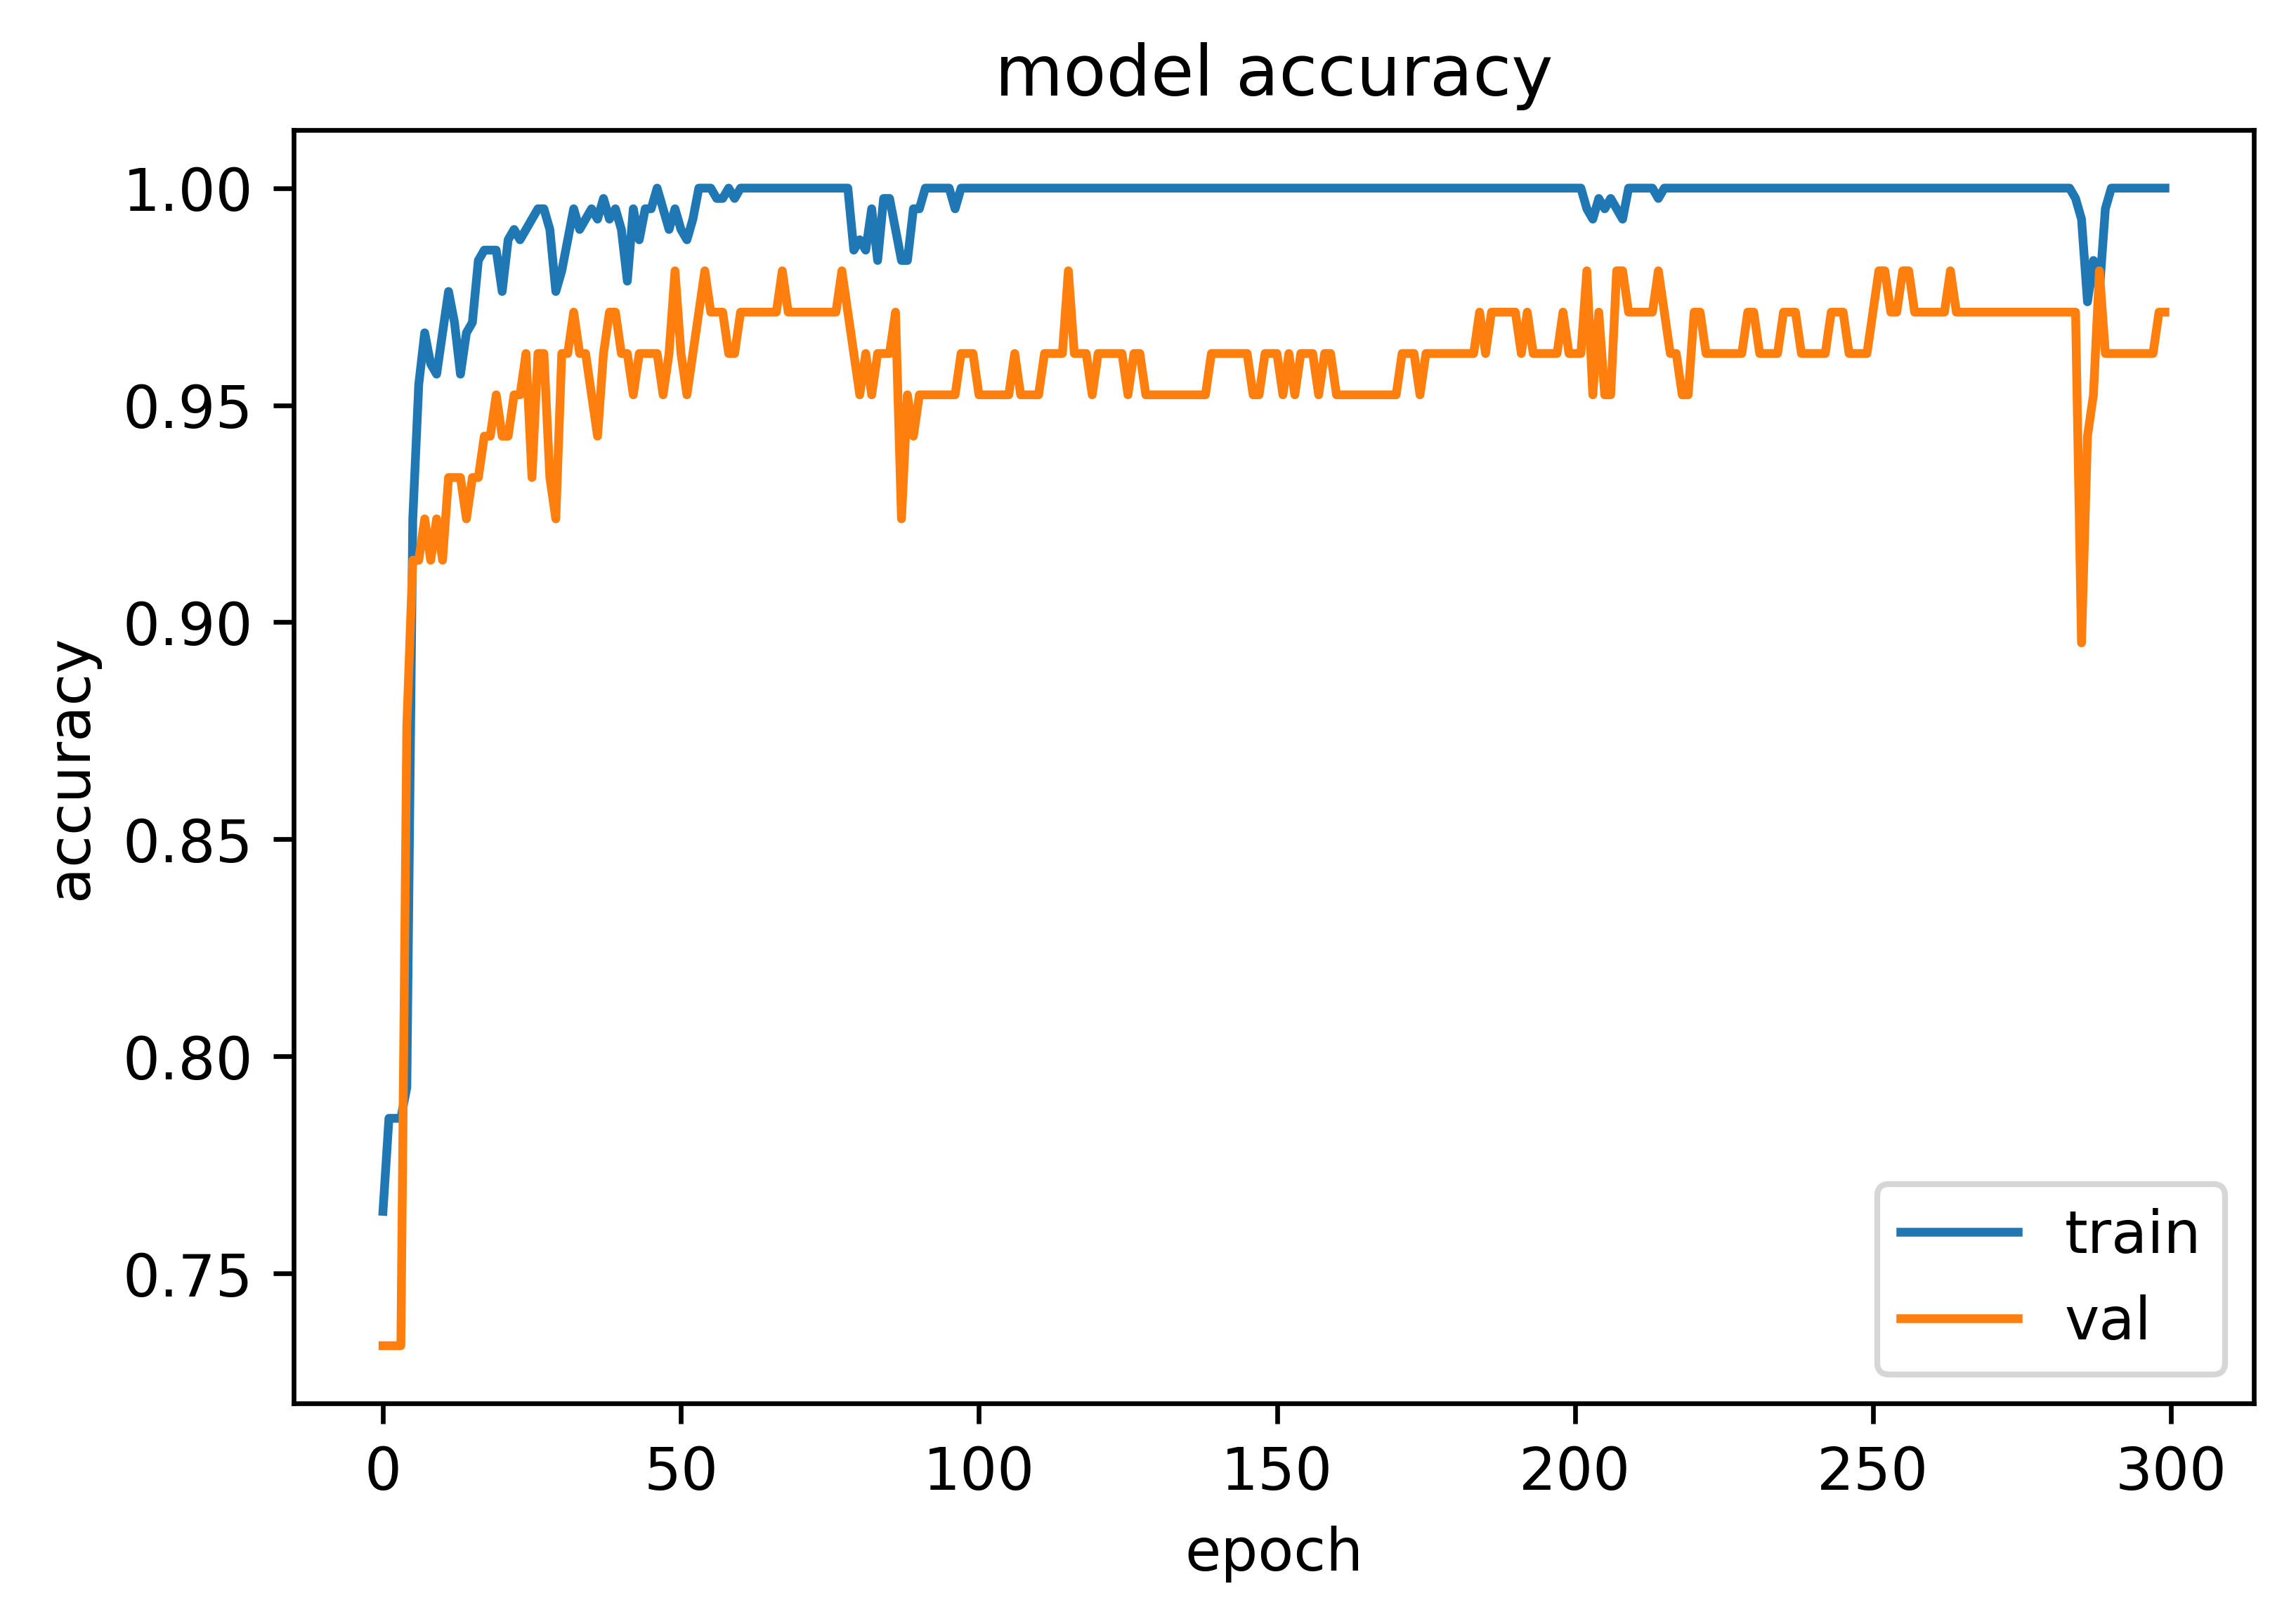

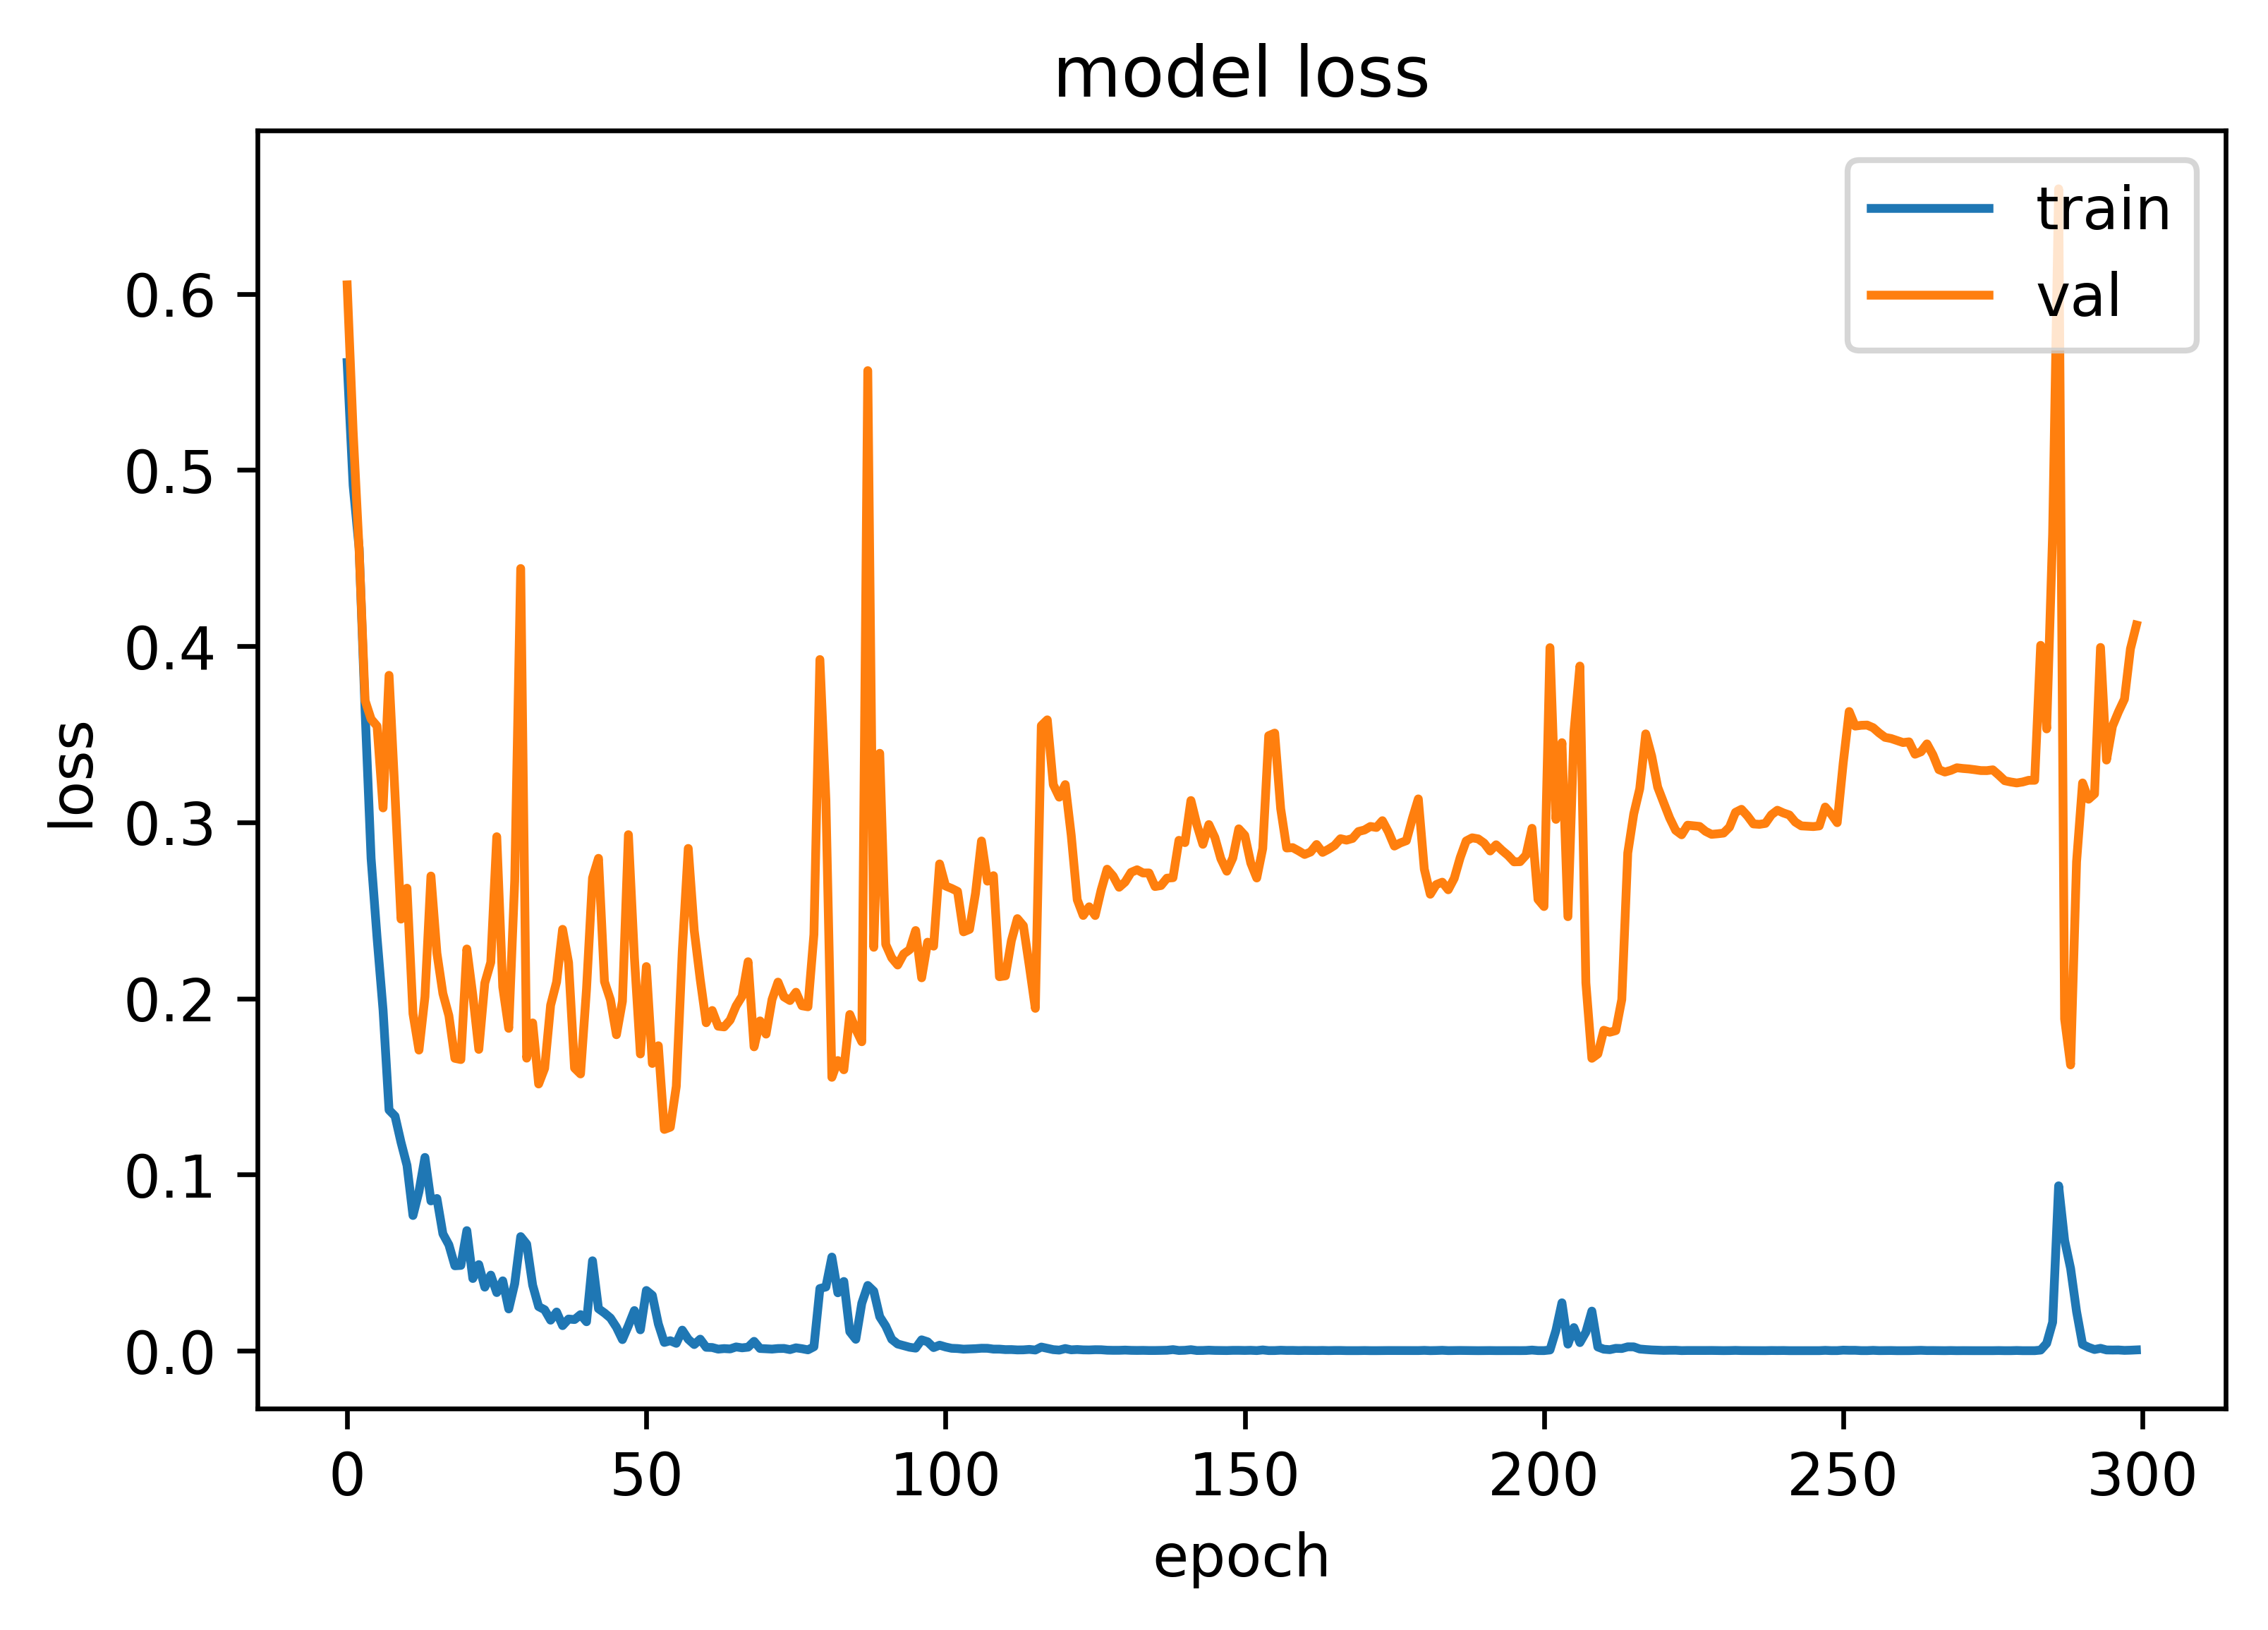

In [ ]:
plt.figure(dpi=600)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
plt.figure(dpi=600)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.2516528069972992
Test accuracy: 0.9696969985961914


In [ ]:
inte1 = onehot_encoder.inverse_transform(y_test)
fi1 = label_encoder.inverse_transform(inte1)
Y_pred1 = model.predict(X_test)
inte = onehot_encoder.inverse_transform(Y_pred1)
fi = label_encoder.inverse_transform(inte)
Y_pred1=np.argmax(Y_pred1, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


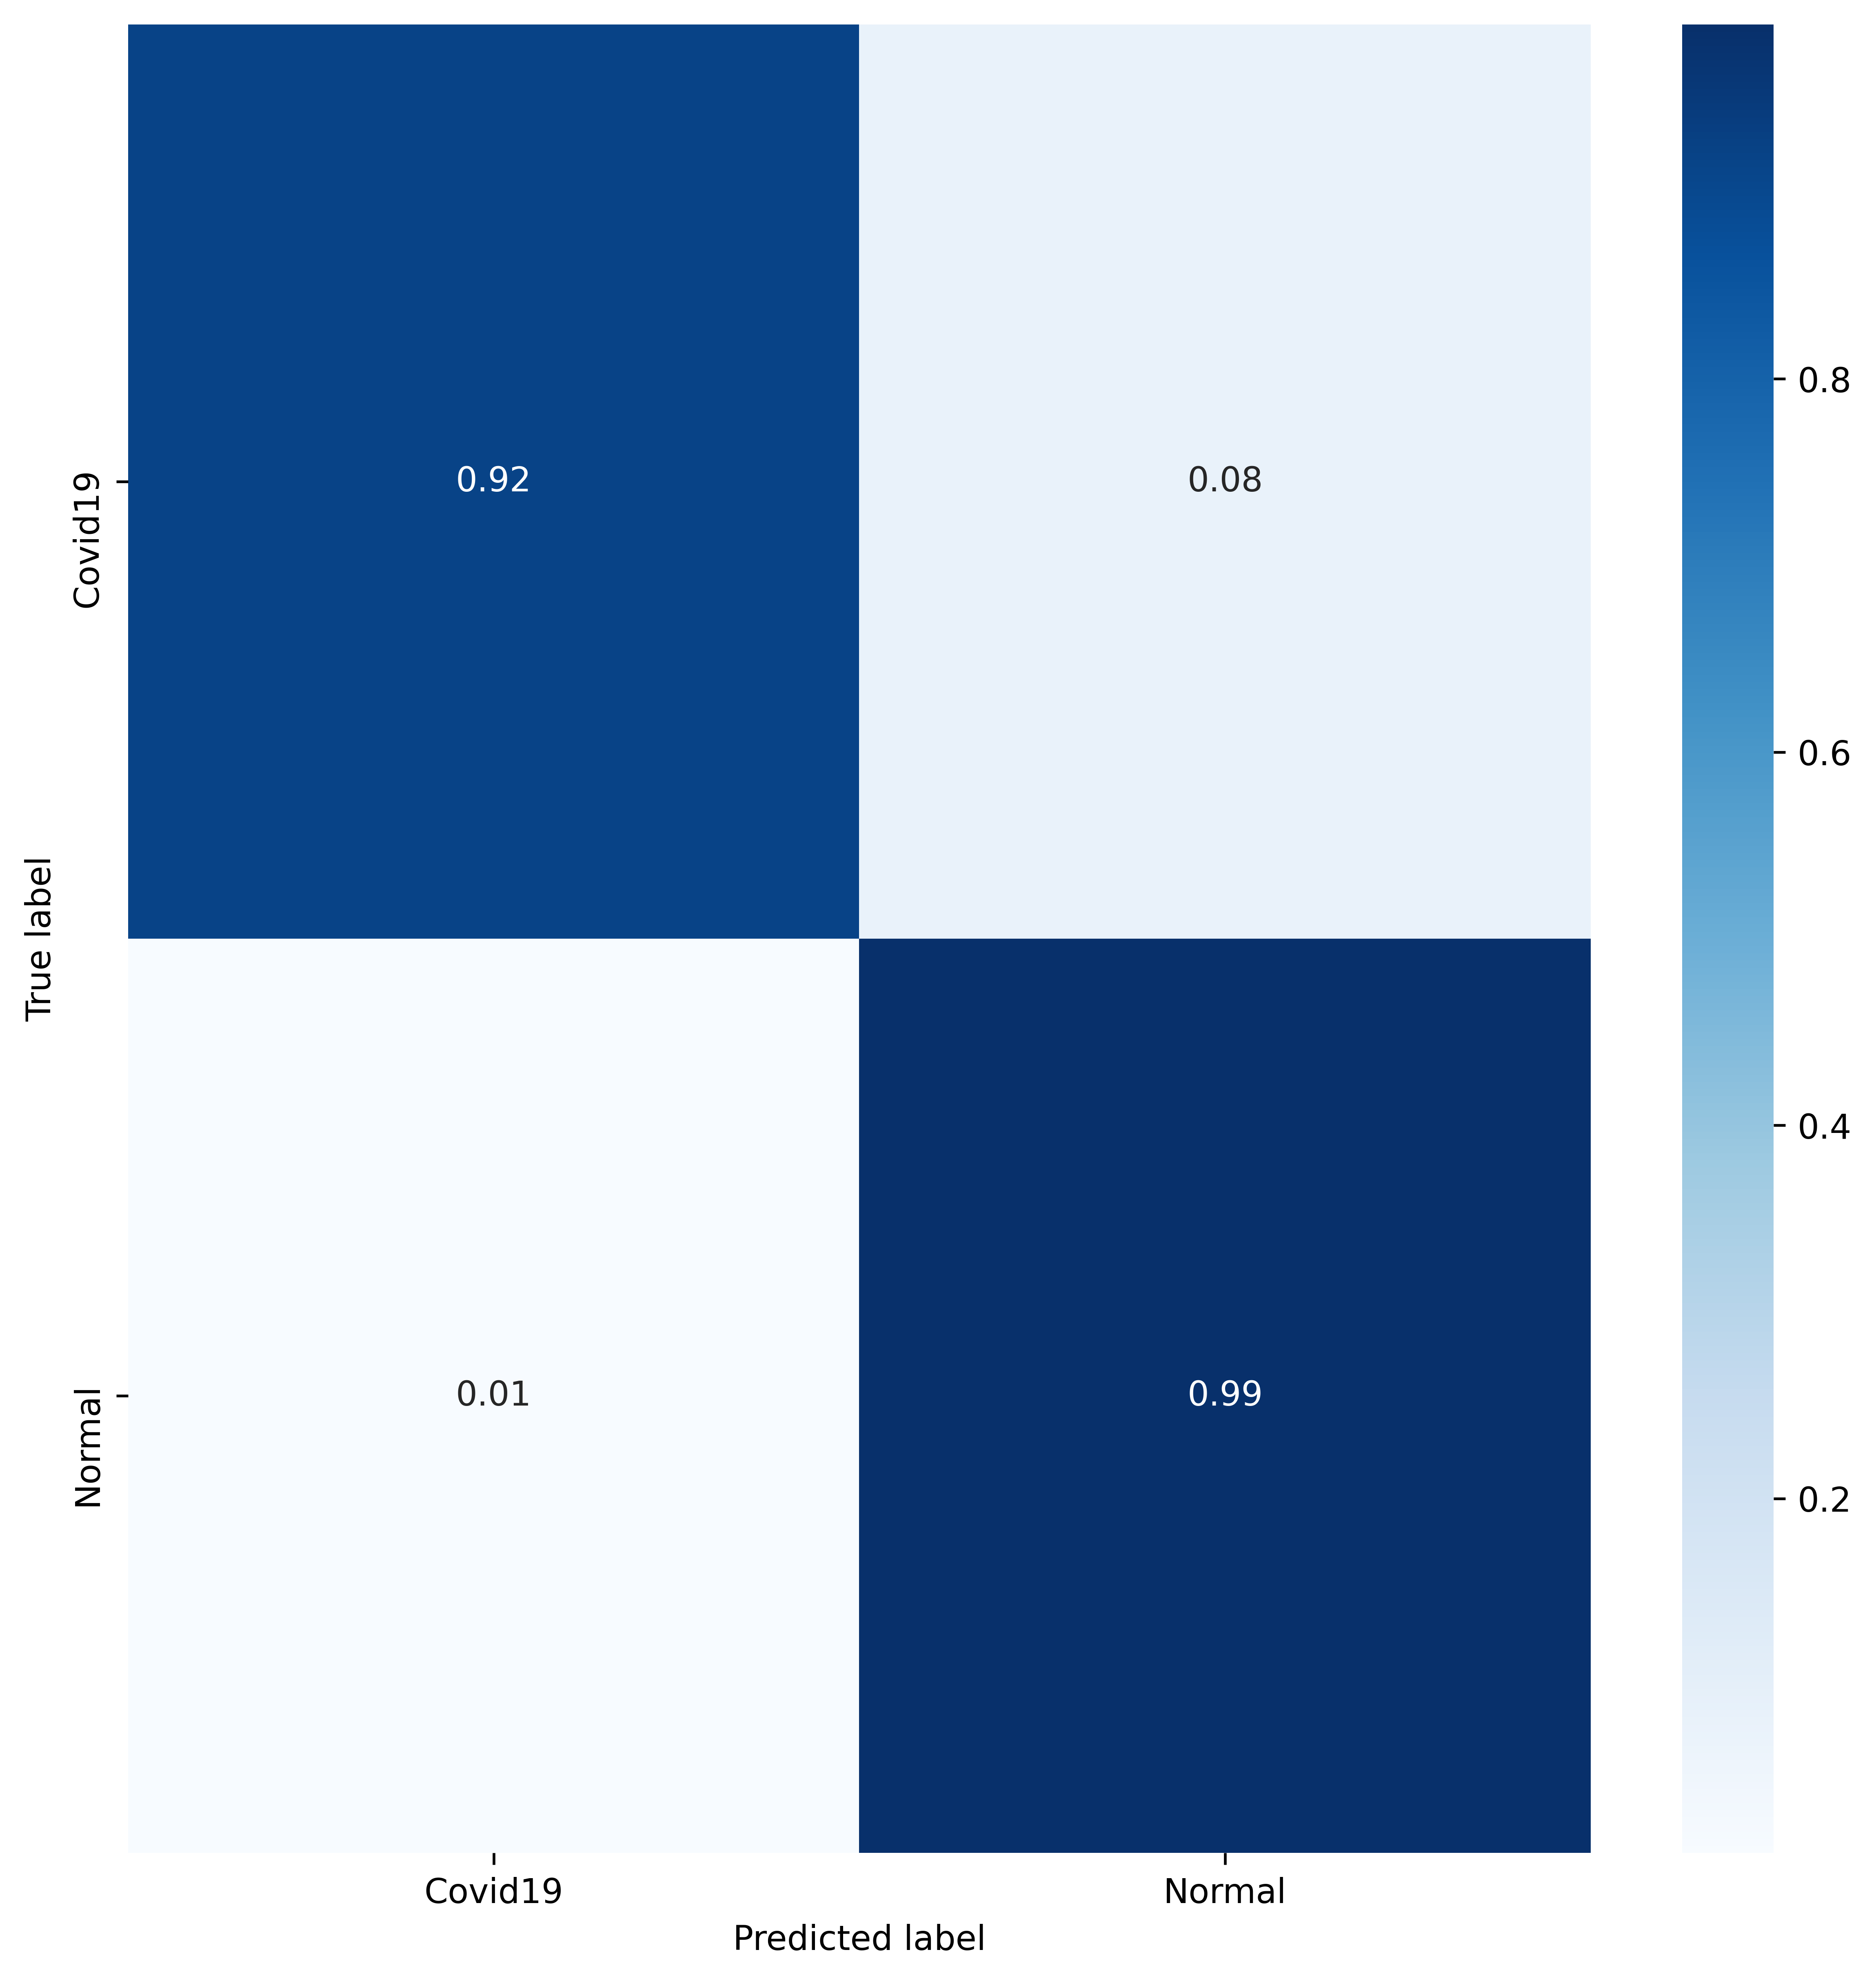

In [ ]:
import seaborn as sns
target_names=['Covid19', 'Normal']
labels=np.argmax(y_test, axis=1)
con_mat = confusion_matrix(labels, Y_pred1)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = target_names, 
                     columns = target_names)
figure = plt.figure(figsize=(8, 8),dpi=600)
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print("Precision Score : ",precision_score(fi1, fi, pos_label=arr[0], average='binary'))
print("Recall Score : ",recall_score(fi1, fi, pos_label=arr[0],average='binary'))
print('Accuracy Score : ' + str(accuracy_score(fi1,fi)))
print('F1 Score : ' + str(f1_score(fi1,fi, pos_label=arr[0],average='binary')))

Precision Score :  0.972972972972973
Recall Score :  0.9230769230769231
Accuracy Score : 0.9696969696969697
F1 Score : 0.9473684210526315


In [ ]:
print('Classification Report')
target_names = ['Covid', 'Normal']
print(classification_report(fi1, fi, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Covid       0.97      0.92      0.95        39
      Normal       0.97      0.99      0.98        93

    accuracy                           0.97       132
   macro avg       0.97      0.96      0.96       132
weighted avg       0.97      0.97      0.97       132



In [ ]:
cm1 = confusion_matrix(labels, Y_pred1)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9230769230769231
Specificity :  0.989247311827957


In [ ]:
print(fi1)
print(len(fi1))
print(fi)
print(len(fi))
tfi1=[]
tfi=[]

for i in fi1:
  if(i==2):
    tfi1.append(0)
  if(i==1):
    tfi1.append(1)

for i in fi:
  if(i==2):
    tfi.append(0)
  if(i==1):
    tfi.append(1)

print(tfi1)
print(len(tfi1))
print(tfi)
print(len(tfi))

[2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 1 2 2 1 1 1
 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 1 1 2 2 1 2 2
 2 2 2 1 2 1 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 1 2 2 1 2 1 2 2 2 1]
132
[2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 1 2 2 1 1 1
 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 1 2 2 1 2 2
 2 2 2 1 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1]
132
[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]
132
[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0

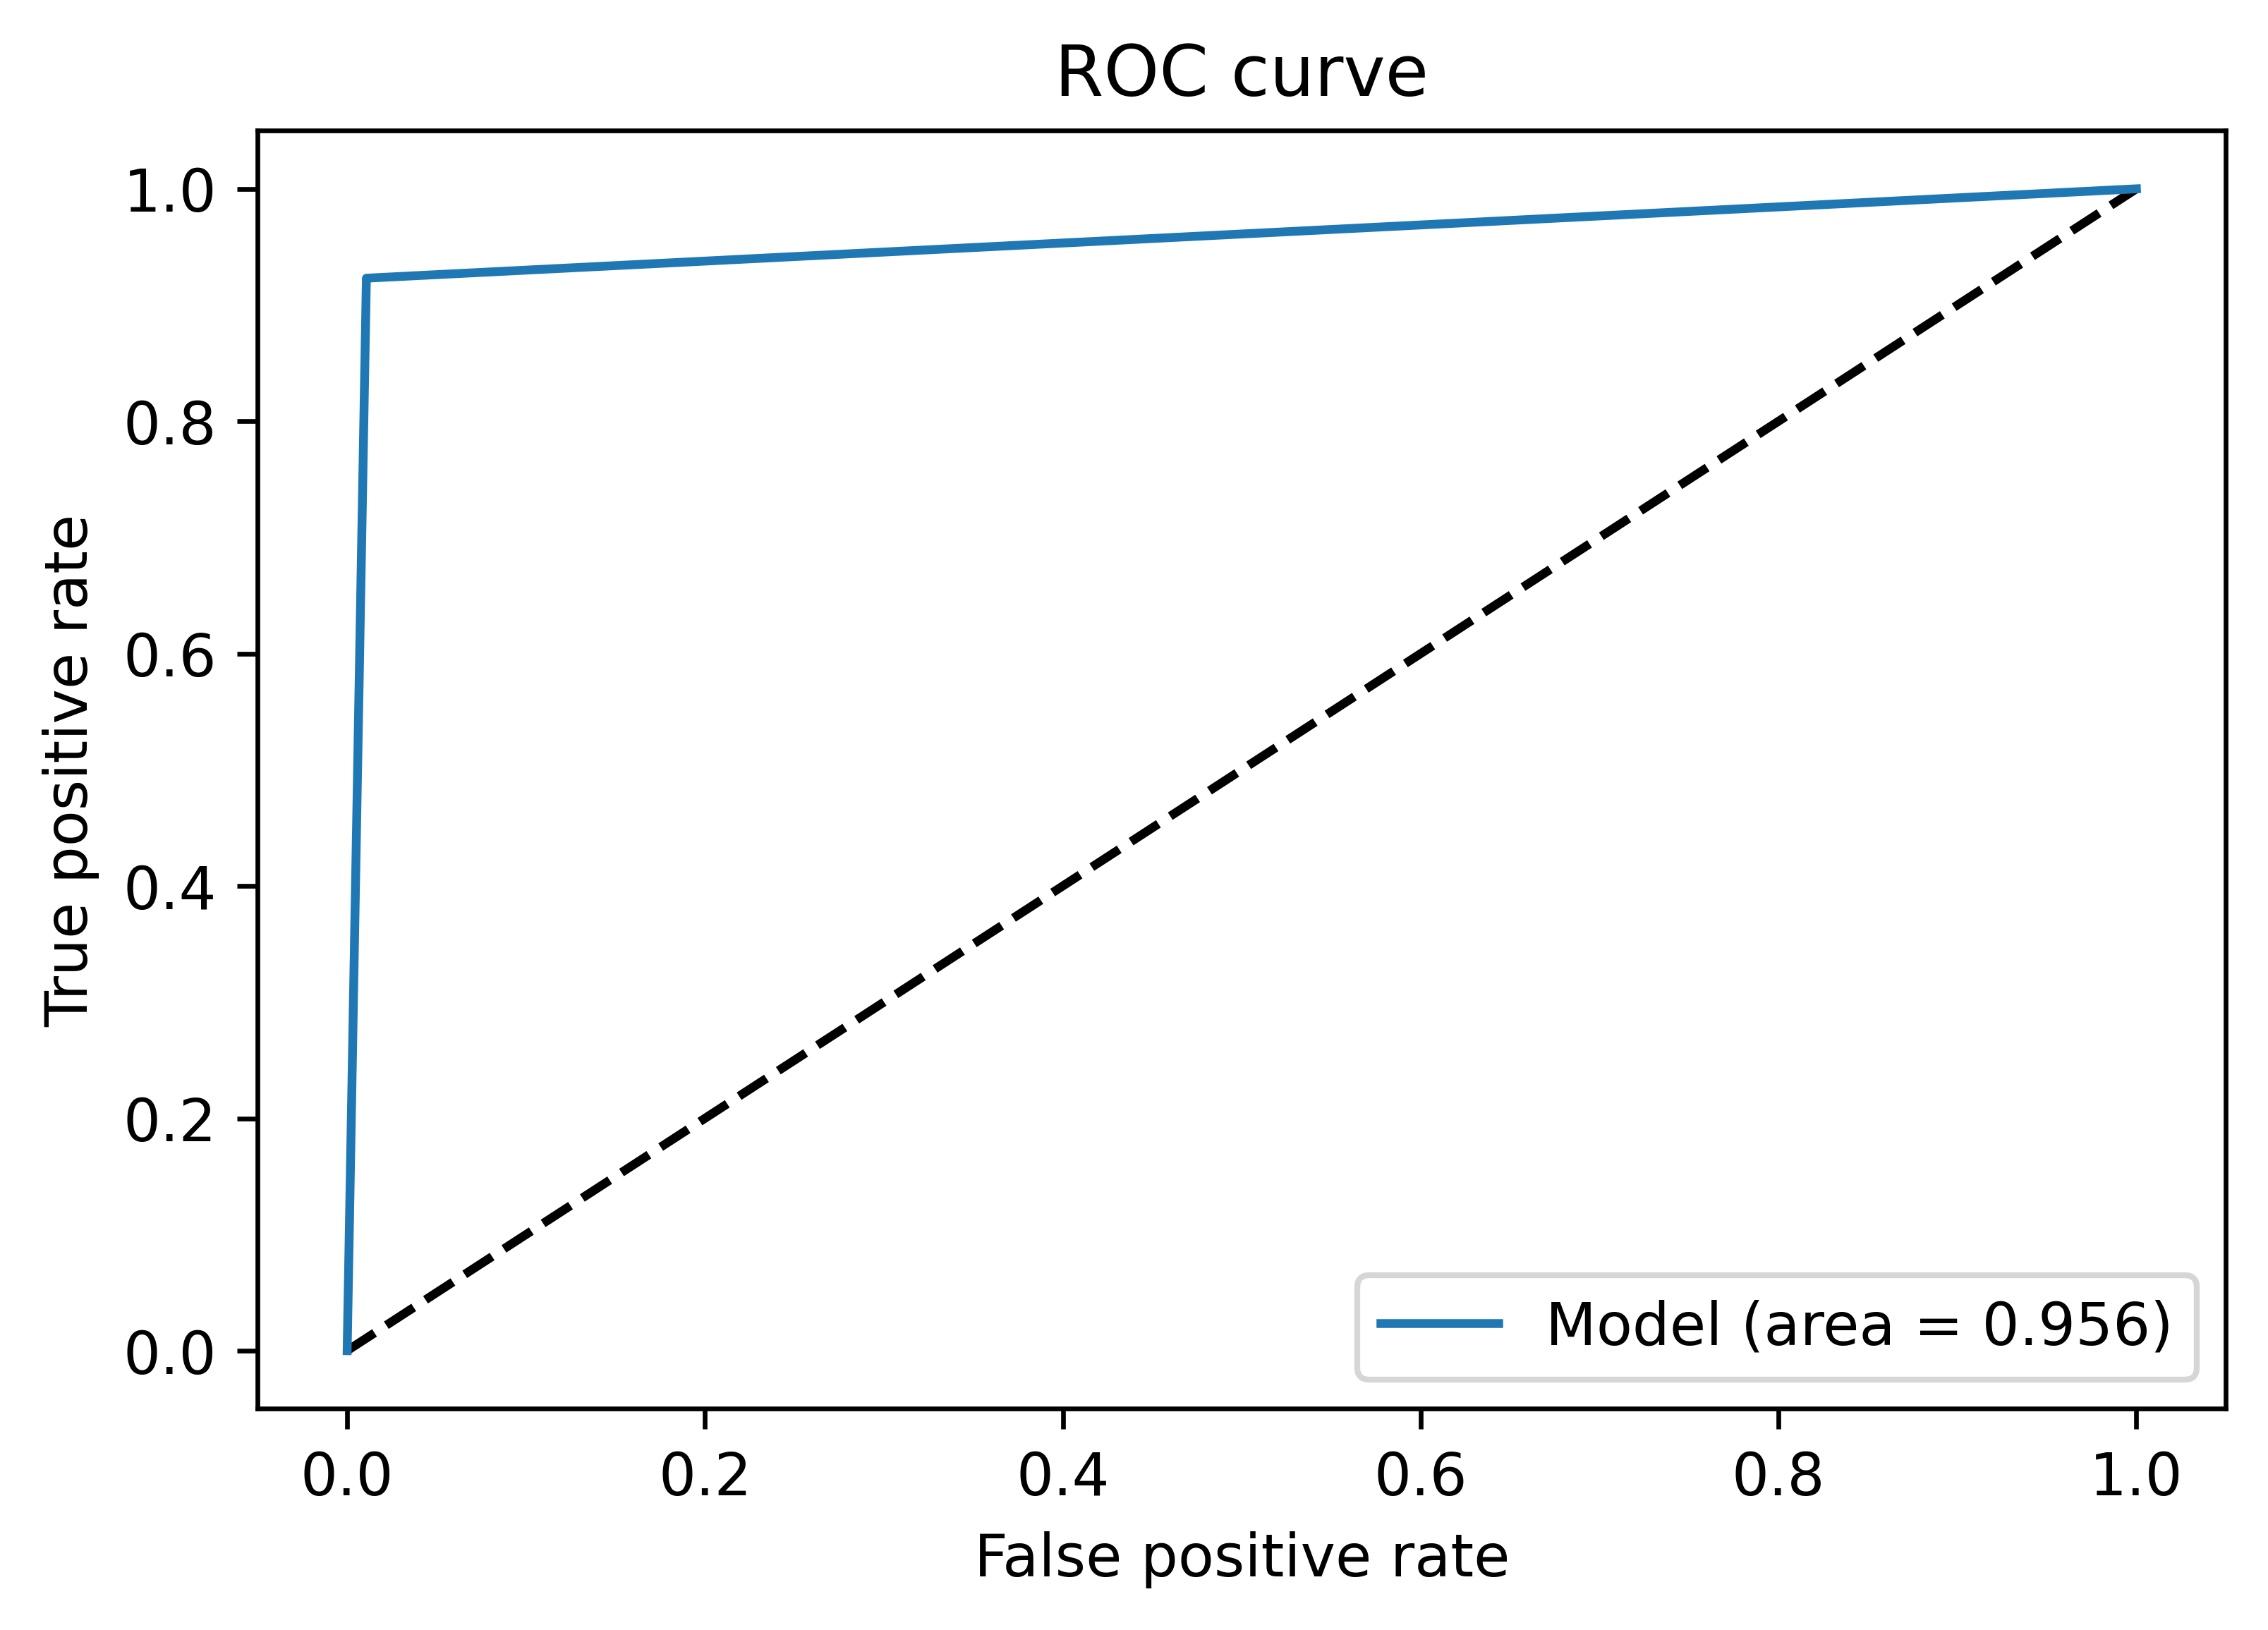

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(tfi1, tfi,pos_label=arr[0])
auc_keras = auc(fpr, tpr)
plt.figure(dpi=600)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Model (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(fi1, fi))

0.030303030303030304


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(fi1, fi, squared=False))

0.17407765595569785


In [ ]:
model.save("/content/gdrive/My Drive/Covid-19/Covid-CNN.h5")